In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [3]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [5]:
# drop `Segmenatation` column for unsupervised laerning
train_df = train_df.drop(columns='Segmentation')

# merge two datasets
df = pd.concat([train_df, test_df], ignore_index=True)

In [6]:
df.shape

(10695, 10)

In [8]:
display(df.describe().T.style.background_gradient())

,count,mean,std,min,25%,50%,75%,max
ID,10695.000000,463468.088640,2600.966411,458982.000000,461220.500000,463451.000000,465733.500000,467974.000000
Age,10695.000000,43.511828,16.774158,18.000000,30.000000,41.000000,53.000000,89.000000
Work_Experience,9597.000000,2.619777,3.390790,0.000000,0.000000,1.000000,4.000000,14.000000
Family_Size,10247.000000,2.844052,1.536427,1.000000,2.000000,3.000000,4.000000,9.000000


# Data Cleaning

## Handle Nulls

In [9]:
# check how many nulls in the dataset
nulls = df.isnull().sum()
null_percentage = round(nulls*100/len(df),2)
null_df = pd.DataFrame({'num_nulls':nulls, 'null_percentage':null_percentage})

# show the columns with nulls only
null_df = null_df[null_df['num_nulls']>0]

display(null_df)

,num_nulls,null_percentage
Ever_Married,190,1.78
Graduated,102,0.95
Profession,162,1.51
Work_Experience,1098,10.27
Family_Size,448,4.19
Var_1,108,1.01


There are quite some null values in the dataset, with a consistent distribution across training and test set. Since the perentage is not larget enough to justify dropping the features entirely, it is crucial to impute them.

In [10]:
# use mean to impute the numerical features
    
# get numerical features
num_features = df.drop(columns='ID').select_dtypes(include='number').columns

# get the features with nulls only
null_numerical_features = df[num_features].isnull().sum()
num_features_with_nulls = null_numerical_features[null_numerical_features>0].index

# impute training and test sets
for i in num_features_with_nulls:
    df[i] = df[i].fillna(df[i].mean())

For the categorical features, I will use mode to impute the nulls. Let's first look at the mode values for the categorical features that contain nulls.

In [11]:
# get categorical features
cat_features = df.select_dtypes(include='object').columns

# get the features with nulls only
null_cat_features = df[cat_features].isnull().sum()
cat_features_with_nulls = null_cat_features[null_cat_features>0].index

for col in cat_features_with_nulls:
    print('\n')
    print(df[col].value_counts())



Yes    6163
No     4342
Name: Ever_Married, dtype: int64


Yes    6570
No     4023
Name: Graduated, dtype: int64


Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64


Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64


In [12]:
# get modes 
for col in cat_features_with_nulls:
    print(f'The mode for {col} is: {df[col].mode()[0]}')

The mode for Ever_Married is: Yes
The mode for Graduated is: Yes
The mode for Profession is: Artist
The mode for Var_1 is: Cat_6


In [13]:
# use mode to impute the categorical features
for i in cat_features_with_nulls:
    df[i] = df[i].fillna(df[i].mode()[0])

In [14]:
# check if we got all the null values
print(df.isnull().sum())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


## Check Duplicates

In [15]:
# check how many duplicates in the data sets
print(f'There are {train_df.duplicated().sum()} in the train set')
print(f'There are {test_df.duplicated().sum()} in the test set')

There are 0 in the train set
There are 0 in the test set


## Drop ID Column

The `ID` column serves as unique identifier of the customers, which is redundant and does not have any predictive information.

In [16]:
# drop `ID` column
df = df.drop(columns='ID')

# EDA

## Univariate Analysis

### Categorical Features

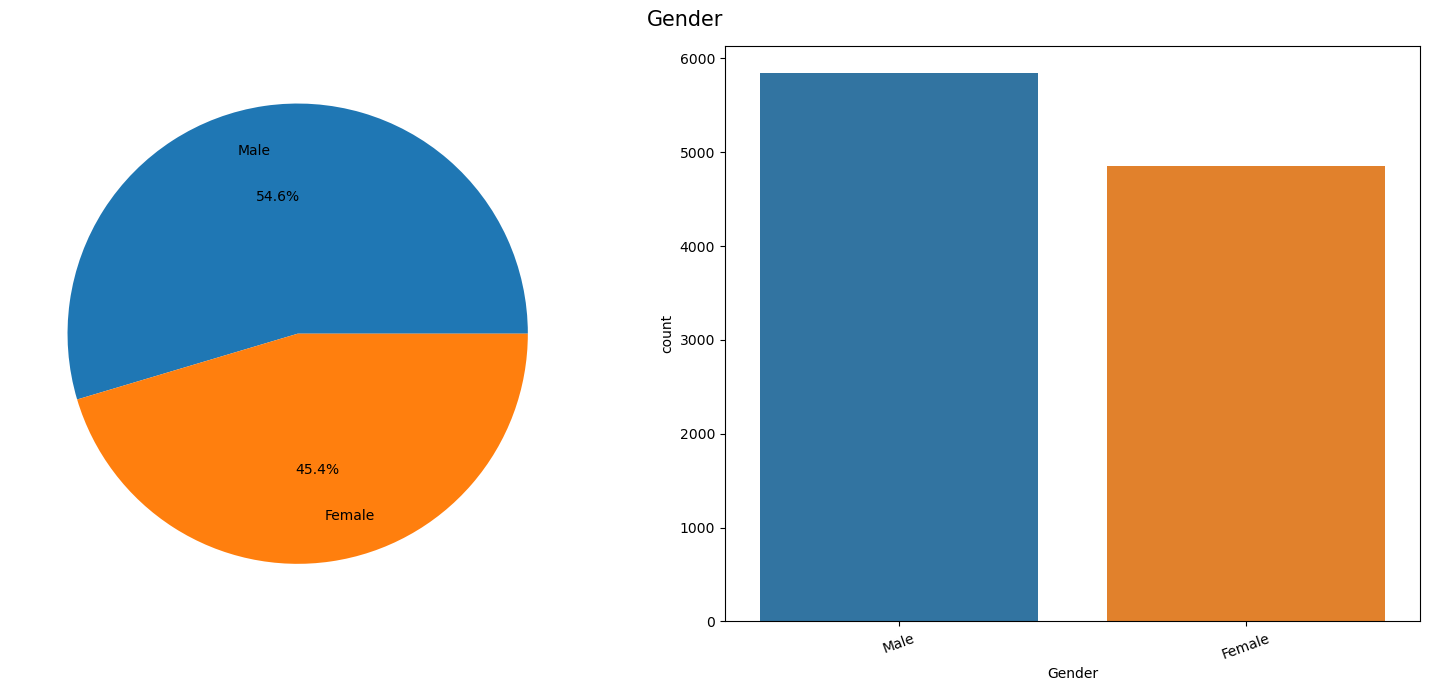

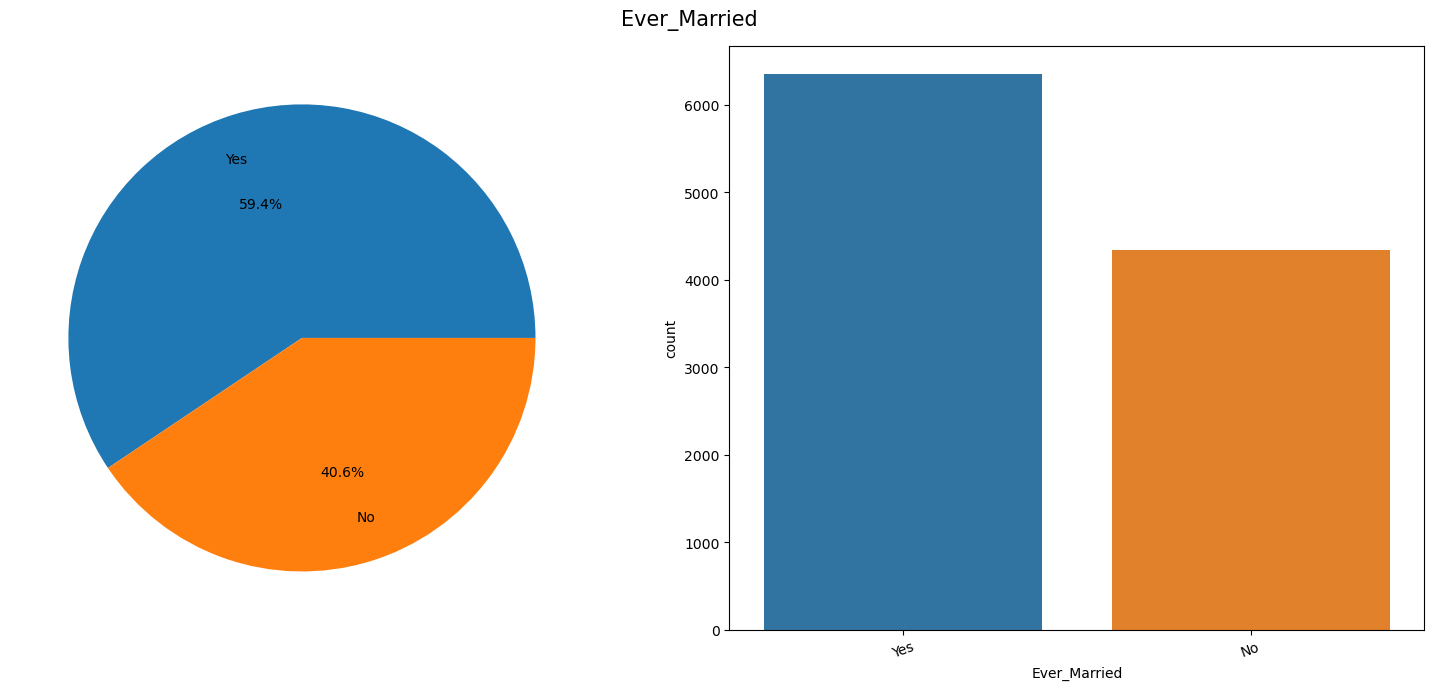

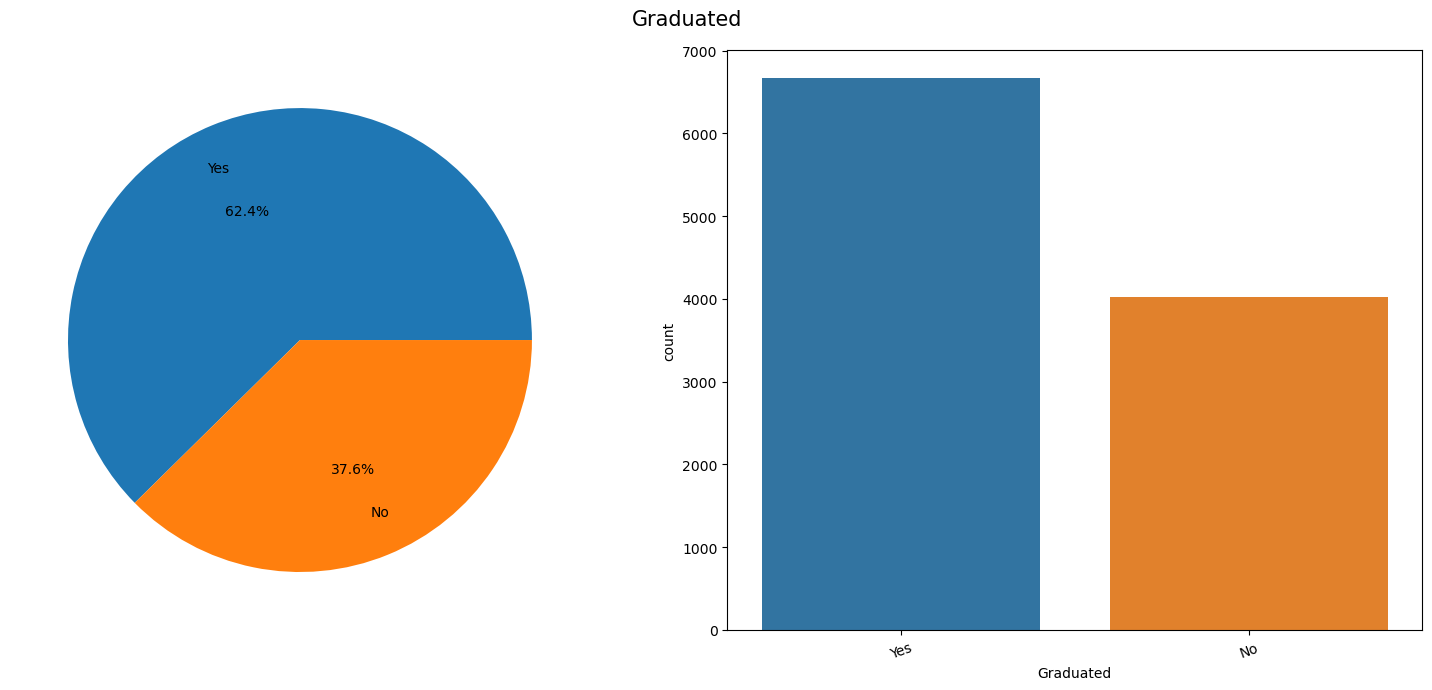

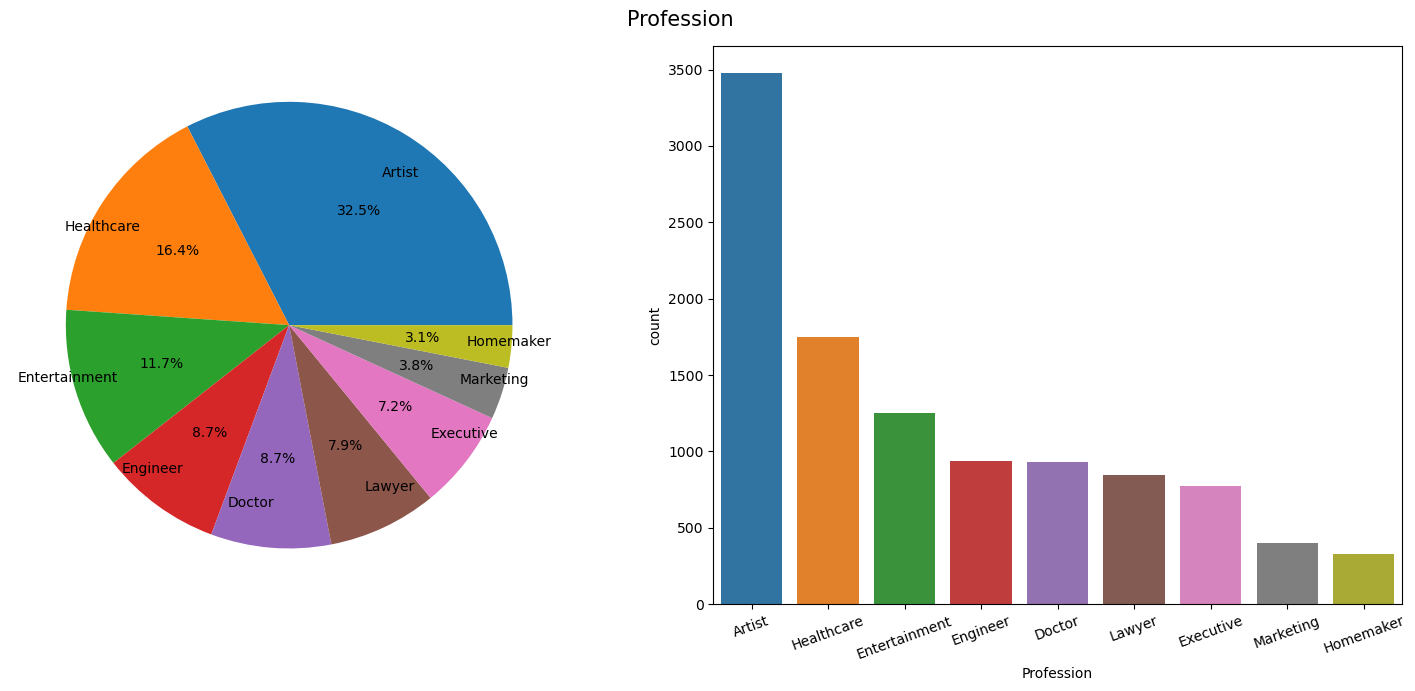

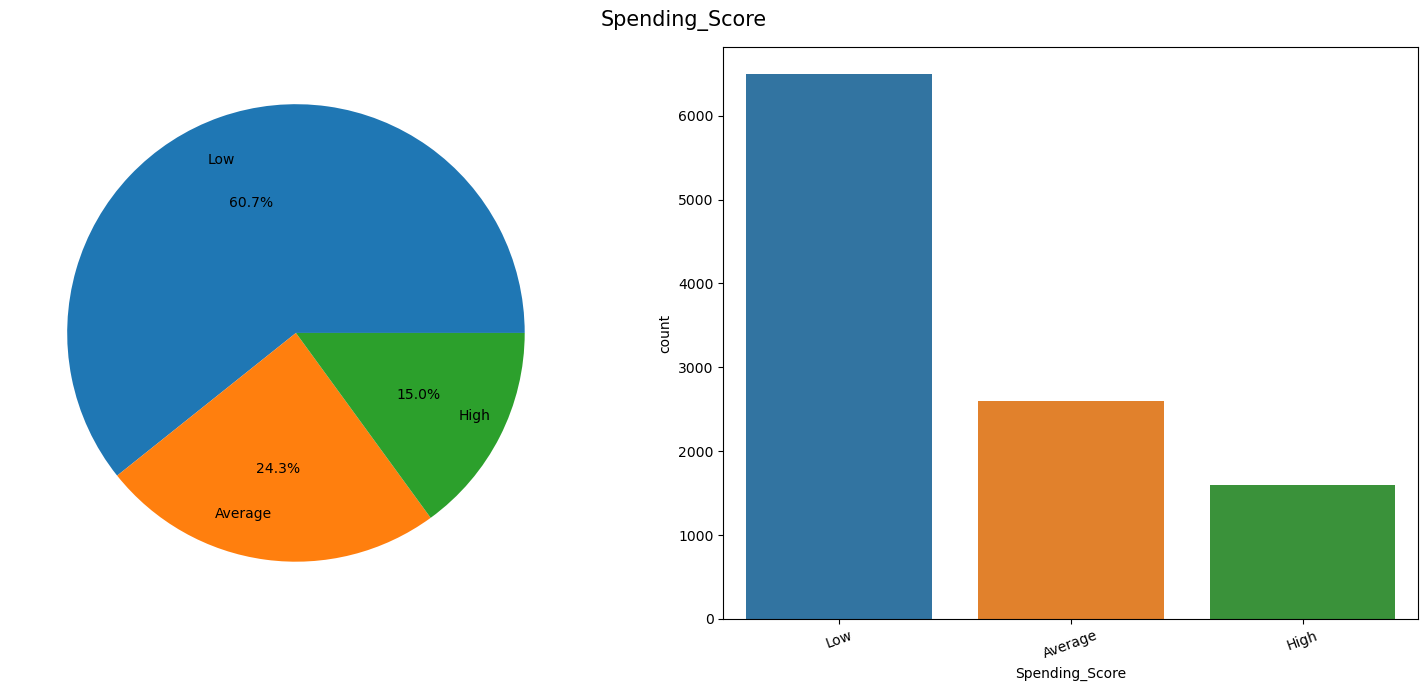

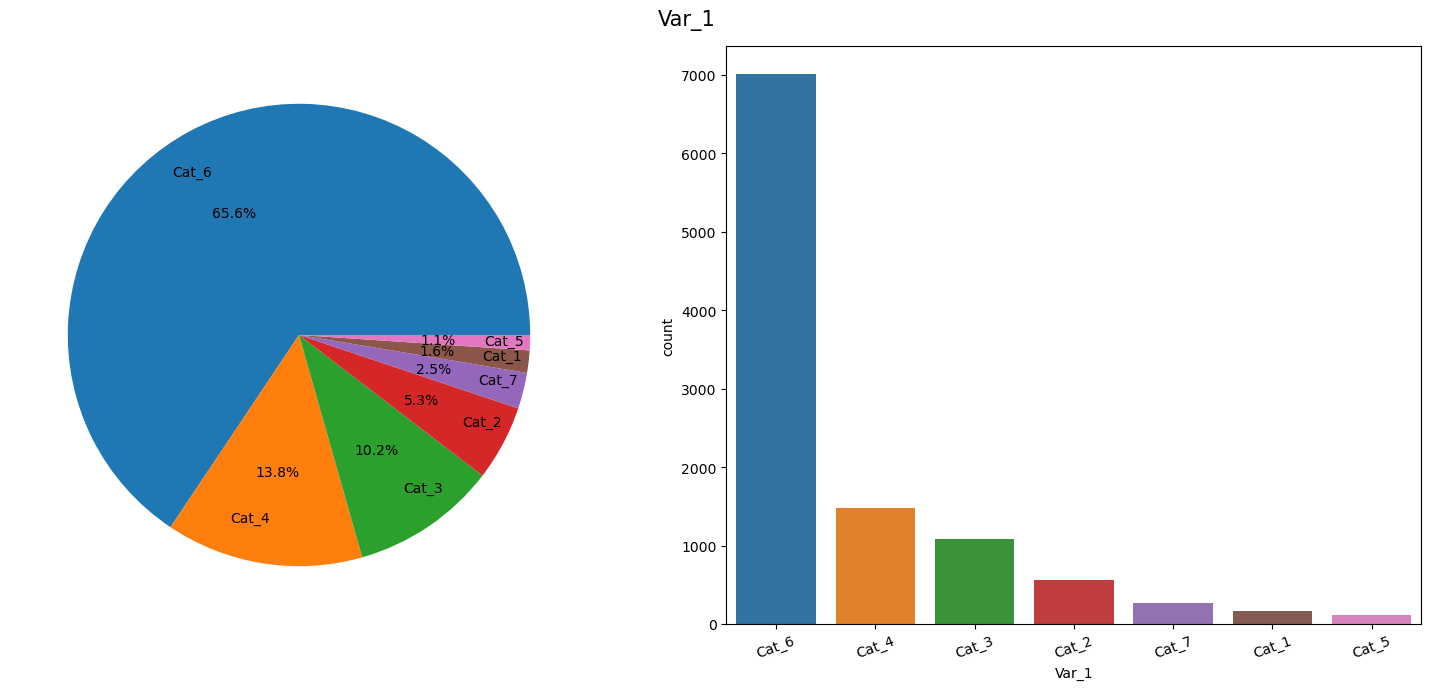

In [19]:
for col in cat_features:
    
    value_counts = df[col].value_counts()
    
    plt.subplots(1,2,figsize=(15,7))
    
    plt.subplot(1,2,1)
    plt.pie(value_counts,
           labels=value_counts.index,
           labeldistance=0.8,
           autopct='%1.1f%%')
    
    plt.subplot(1,2,2)
    sns.countplot(x=df[col],
                 order=value_counts.index)
    plt.xticks(rotation=20)
    
    plt.suptitle(f'{col}',
                fontsize=15)
    
    plt.tight_layout()
    plt.show()

### Numerical Features

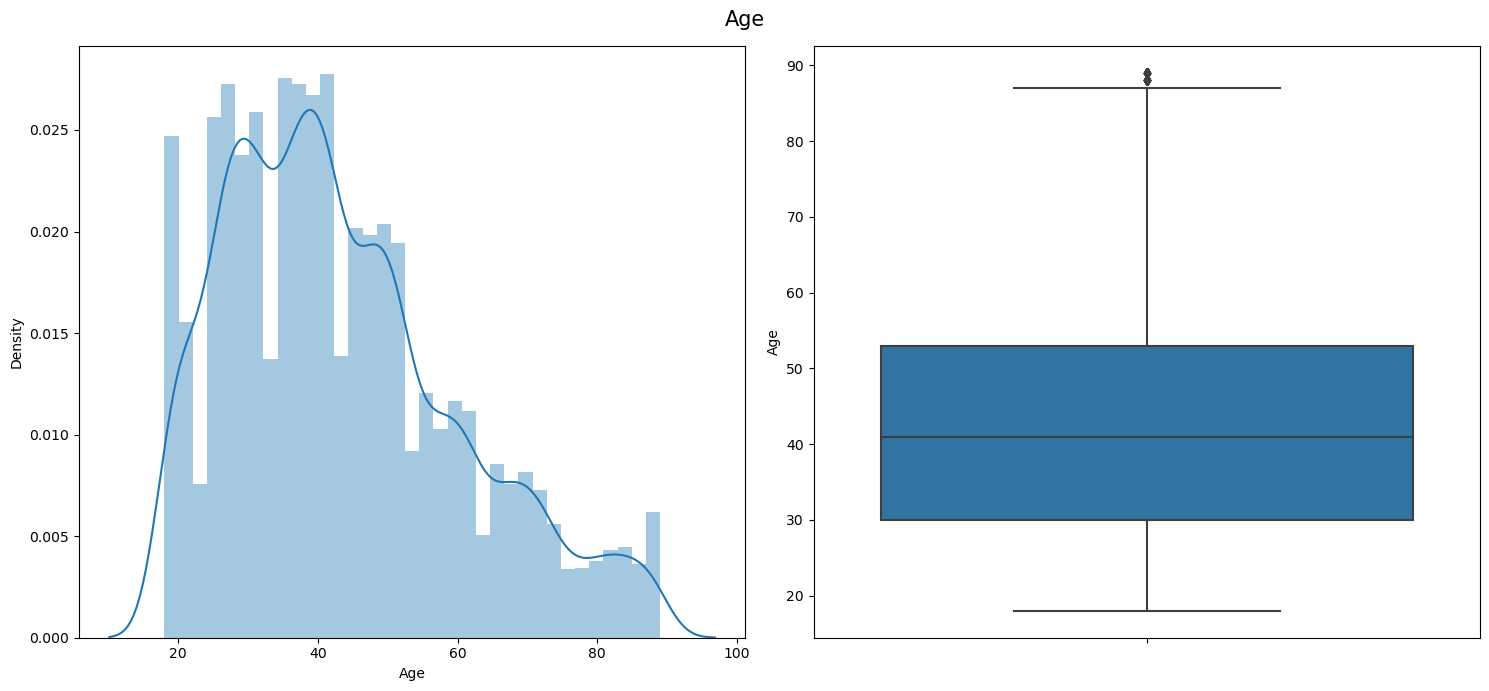

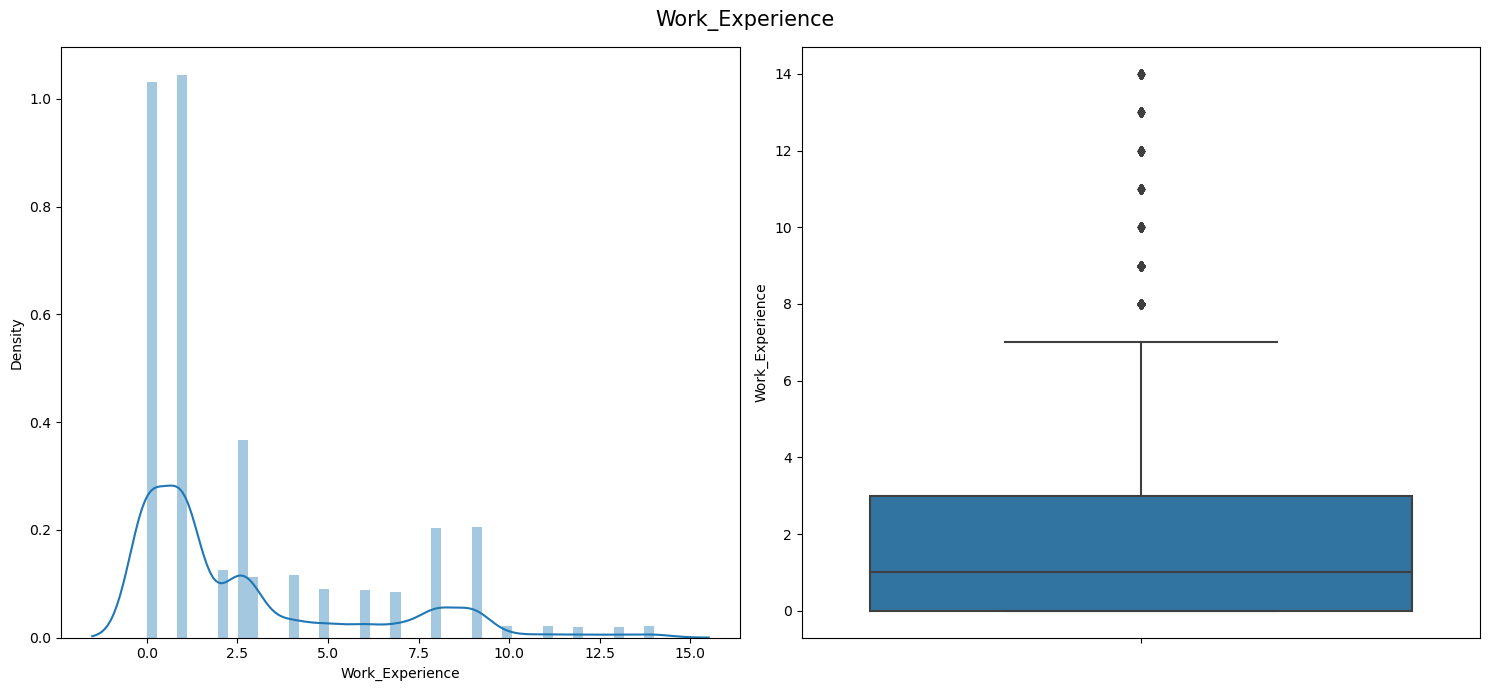

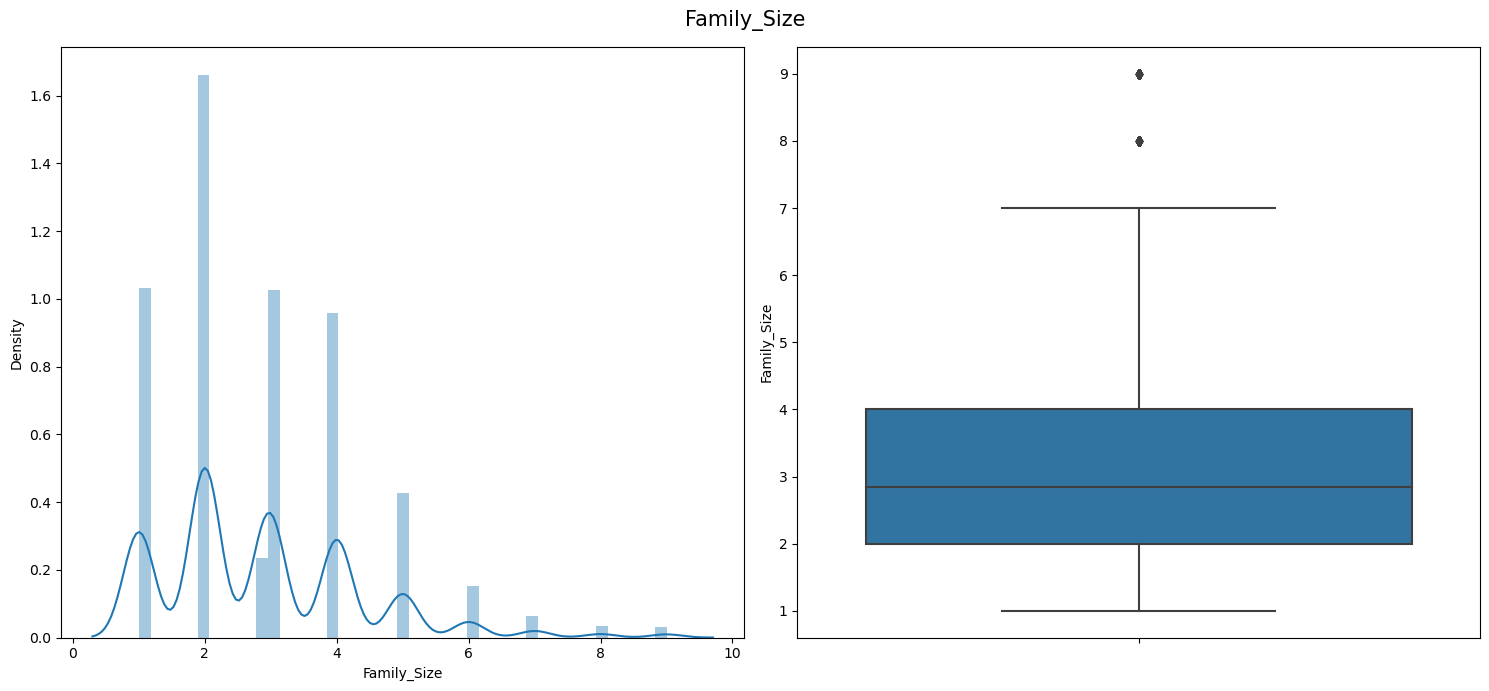

In [20]:
for col in num_features:
    
    plt.subplots(1,2,figsize=(15,7))
    
    plt.subplot(1,2,1)
    sns.distplot(df[col],
               kde=True)
    
    plt.subplot(1,2,2)
    sns.boxplot(df,
               y=col)
    
    plt.suptitle(f'{col}',fontsize=15)
    
    plt.tight_layout()
    plt.show()

`Age` and `Family_Size` are somewhat normally distributed, and all these features are right skewed. There are some outliers exhibited in `Work_Experience` and `Family_Size`, they should be dealt with since clustering models are sensitive to outliers.

## Multivariate Analysis

In [21]:
# get independent variables
ind_variables = df.columns 

print(ind_variables)

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')


### Gender

In [22]:
# assign variables
target = 'Gender'
var_list = ['Ever_Married', 'Graduated']

Ever_Married,No,Yes
Gender,,
Female,0.464977,0.535023
Male,0.356959,0.643041


<Figure size 800x500 with 0 Axes>

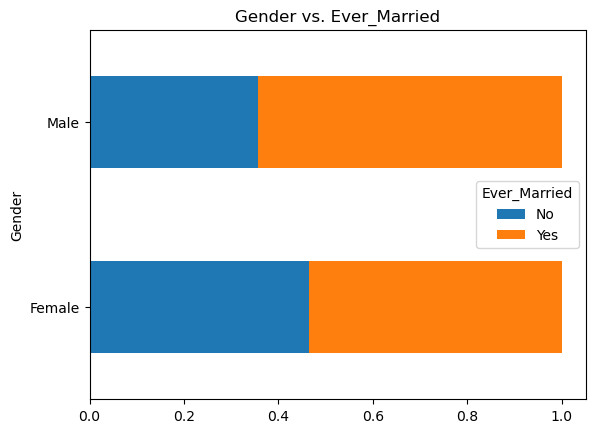

Graduated,No,Yes
Gender,,
Male,0.393255,0.606745
Female,0.355583,0.644417


<Figure size 800x500 with 0 Axes>

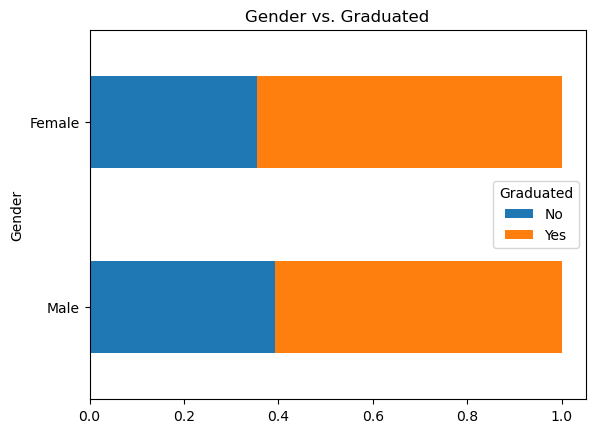

In [23]:
for col in var_list:
    
    # create cross tables
    ct = pd.crosstab(df[target], df[col], normalize='index')
    ct = ct.sort_values(ct.columns[1])
    print('\n')
    display(ct)
    
    # visualize
    plt.figure(figsize=(8,5))
    
    ct.plot(kind='barh', stacked=True)
    
    plt.title(f'Gender vs. {col}')
    plt.show()

- There are about 10% more male customers have married before than female customers.
- The graduation status percentages between the two genders are fairly similar, although female customers have a slight lead.

### Ever_Married

In [24]:
# create cross tables
ct = pd.crosstab(df['Ever_Married'], df['Graduated'], normalize='index').sort_values('Yes')
ct

Graduated,No,Yes
Ever_Married,,
No,0.487794,0.512206
Yes,0.299858,0.700142


<Figure size 800x500 with 0 Axes>

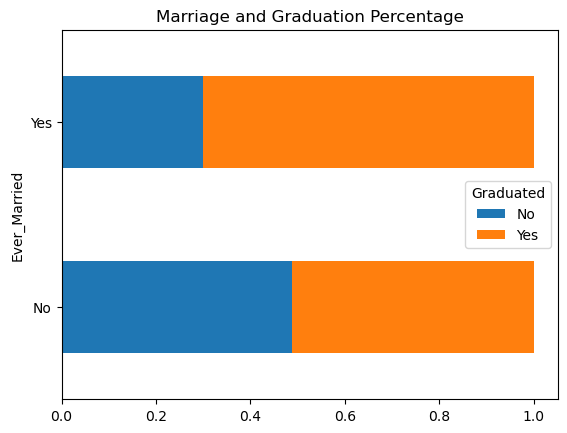

In [25]:
# visualize
plt.figure(figsize=(8,5))

ct.plot(kind='barh', stacked=True)

plt.title(f'Marriage and Graduation Percentage')
plt.show()

People who graduated from a university are more likely to have a marriage.

### Profession

In [26]:
# assign variables
target = 'Profession'
var_list = ['Gender', 'Ever_Married', 'Graduated']

Gender,Female,Male
Profession,,
Homemaker,0.823171,0.176829
Engineer,0.794652,0.205348
Marketing,0.553350,0.446650
Lawyer,0.497630,0.502370
Artist,0.483046,0.516954
Doctor,0.451613,0.548387
Healthcare,0.410857,0.589143
Entertainment,0.270400,0.729600
Executive,0.051613,0.948387


<Figure size 800x500 with 0 Axes>

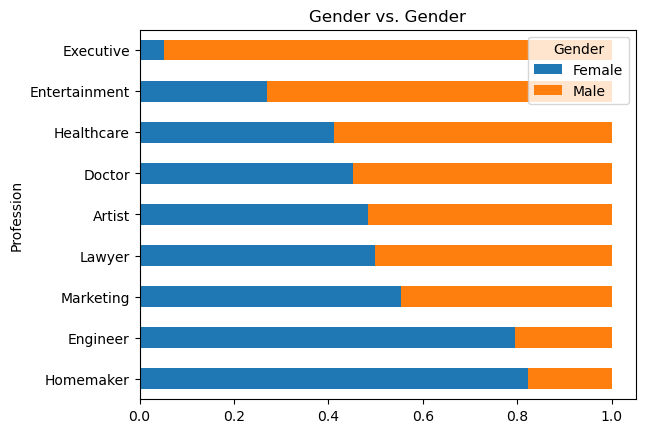

Ever_Married,No,Yes
Profession,,
Healthcare,0.865714,0.134286
Marketing,0.632754,0.367246
Doctor,0.515054,0.484946
Homemaker,0.448171,0.551829
Engineer,0.376471,0.623529
Entertainment,0.373600,0.626400
Artist,0.295115,0.704885
Lawyer,0.063981,0.936019
Executive,0.059355,0.940645


<Figure size 800x500 with 0 Axes>

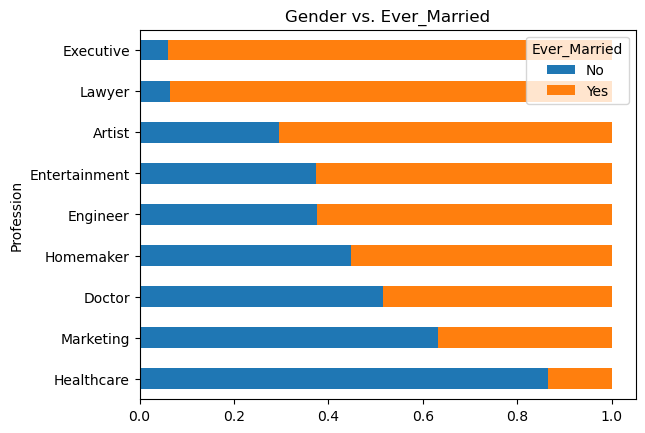

Graduated,No,Yes
Profession,,
Healthcare,0.639429,0.360571
Marketing,0.600496,0.399504
Engineer,0.544385,0.455615
Executive,0.490323,0.509677
Homemaker,0.439024,0.560976
Doctor,0.406452,0.593548
Lawyer,0.381517,0.618483
Entertainment,0.368000,0.632000
Artist,0.134770,0.865230


<Figure size 800x500 with 0 Axes>

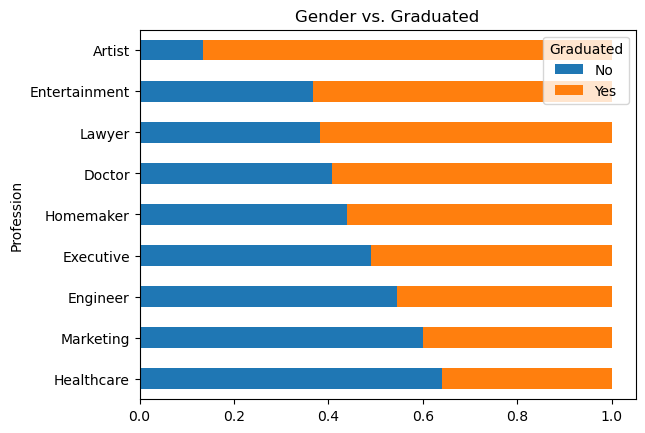

In [27]:
for col in var_list:
    
    # create cross tables
    ct = pd.crosstab(df[target], df[col], normalize='index')
    ct = ct.sort_values(ct.columns[1])
    print('\n')
    display(ct)
    
    # visualize
    plt.figure(figsize=(8,5))
    
    ct.plot(kind='barh', stacked=True)
    
    plt.title(f'Gender vs. {col}')
    plt.show()

- `Executive` and `Entertainment` roles are predominantly held by males, whereas `Engineer` and `Homemaker` positions are primarily occupied by females.
- Individuals with professions such as `Executive` and `Lawyer` have a 93% likelihood of getting married, whereas those in `Healthcare` show a lower probability of marriage.
- Surprisingly, the highest number of graduates are found among `Artist` professionals.

### Spending Score

In [28]:
# assign variables
target = 'Spending_Score'
var_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']

Gender,Female,Male
Spending_Score,,
Low,0.477672,0.522328
Average,0.424394,0.575606
High,0.405119,0.594881


<Figure size 800x500 with 0 Axes>

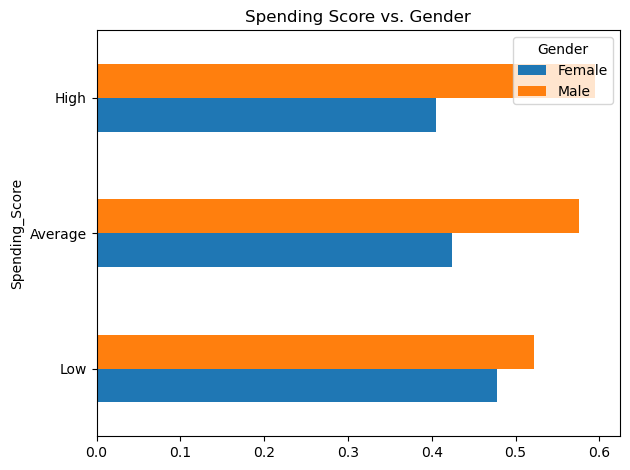

Ever_Married,No,Yes
Spending_Score,,
Low,0.668617,0.331383
Average,0.000000,1.000000
High,0.000000,1.000000


<Figure size 800x500 with 0 Axes>

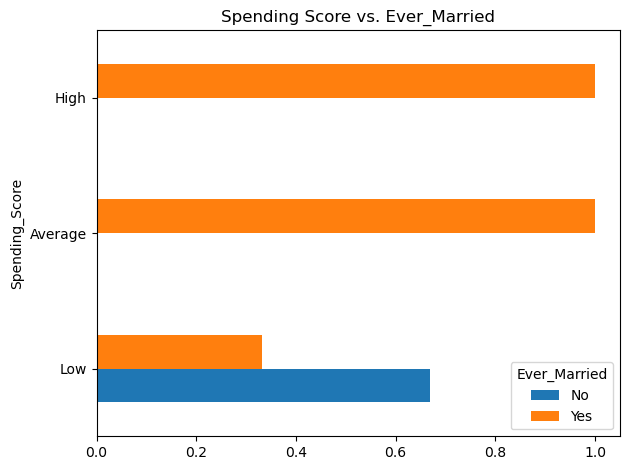

Graduated,No,Yes
Spending_Score,,
Low,0.429319,0.570681
High,0.352684,0.647316
Average,0.257791,0.742209


<Figure size 800x500 with 0 Axes>

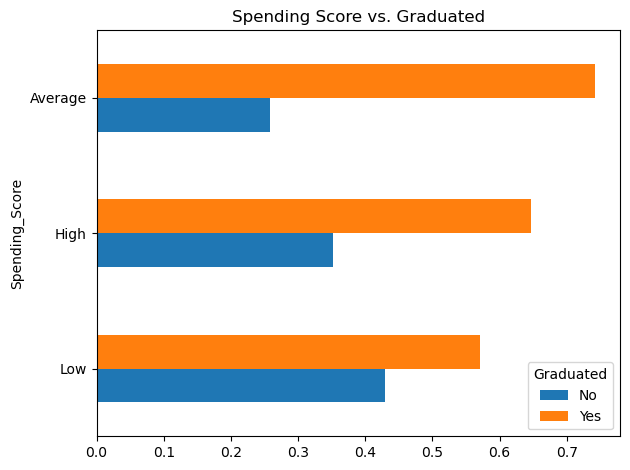

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Spending_Score,,,,,,,,,
High,0.207865,0.026217,0.047441,0.038702,0.320849,0.034332,0.021223,0.275281,0.028090
Average,0.521739,0.094652,0.115429,0.161601,0.036553,0.020777,0.030012,0.009234,0.010004
Low,0.275793,0.098860,0.086079,0.118263,0.025562,0.252695,0.033261,0.058362,0.051124


<Figure size 800x500 with 0 Axes>

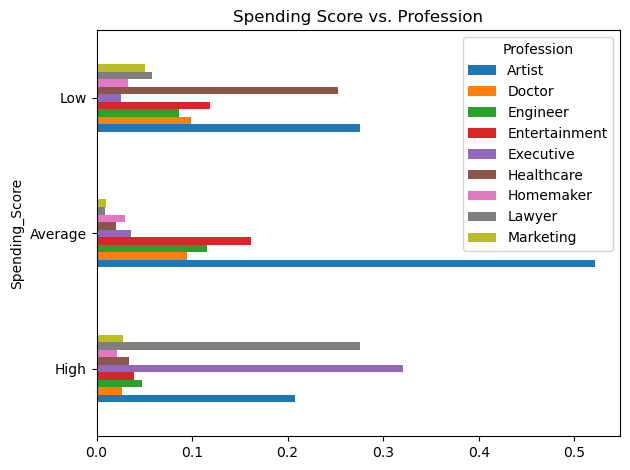

Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Spending_Score,,,,,,,
High,0.013733,0.032459,0.058677,0.096754,0.004994,0.772160,0.021223
Average,0.014621,0.051558,0.099269,0.157368,0.010004,0.644094,0.023086
Low,0.016477,0.058054,0.113489,0.140283,0.012319,0.632430,0.026948


<Figure size 800x500 with 0 Axes>

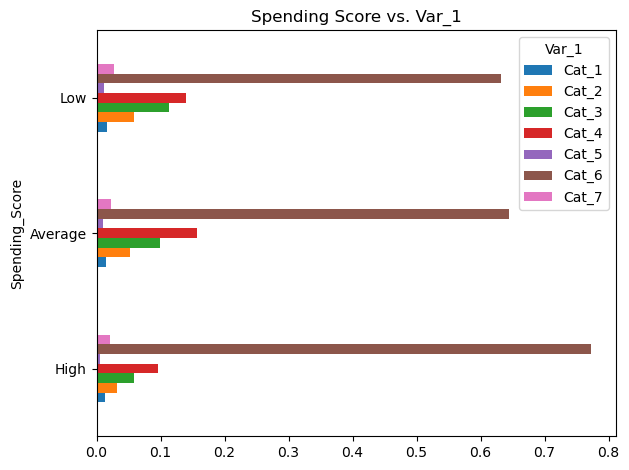

In [29]:
for col in var_list:
    
    # create cross tables
    ct = pd.crosstab(df[target], df[col], normalize='index')
    ct = ct.sort_values(ct.columns[1])
    print('\n')
    display(ct)
    
    # visualize
    plt.figure(figsize=(8,5))
    
    ct.plot(kind='barh', stacked=False)
    
    plt.title(f'Spending Score vs. {col}')
    plt.tight_layout()
    plt.show()

- Male customers are more represented in all spending score categories, while two genders are somewhat equally represented in the low spending score group.This could indicate differences in purchasing habits or financial management between the genders.
- Customers who have married are more likely to spend more money, which makes sense.
- Higher education leads to more earning, therefore higher spending score.
- High spending group is dominated by executives, lawyers, and artists, while artists are predominantly leading the average spending group. Healthcare workers tend to spend less. There seems to be a discrepancy in the earnings of artists.
- The distribution of spending scores is generally consistent across all categories of Var_1, with Cat_6 significantly higher than the others. Cat_5 has the lowest percentage of spending score.

### Var_1

In [30]:
# assign variables
target = 'Var_1'
var_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession']

Gender,Female,Male
Var_1,,
Cat_5,0.605263,0.394737
Cat_1,0.514970,0.485030
Cat_7,0.509294,0.490706
Cat_2,0.481350,0.518650
Cat_3,0.471993,0.528007
Cat_4,0.469831,0.530169
Cat_6,0.439441,0.560559


<Figure size 800x500 with 0 Axes>

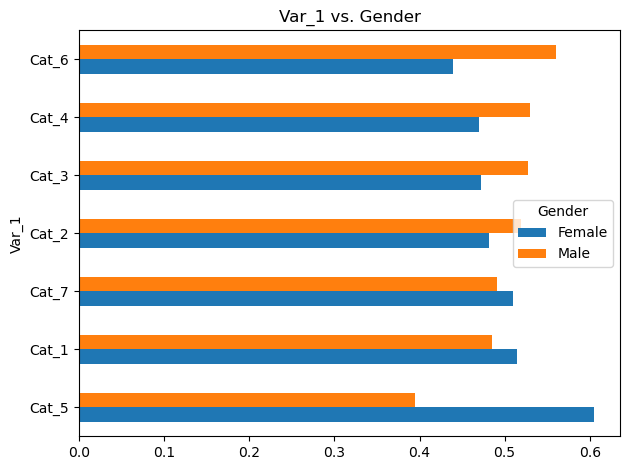

Ever_Married,No,Yes
Var_1,,
Cat_2,0.566607,0.433393
Cat_5,0.552632,0.447368
Cat_7,0.464684,0.535316
Cat_3,0.442608,0.557392
Cat_4,0.433220,0.566780
Cat_1,0.401198,0.598802
Cat_6,0.377173,0.622827


<Figure size 800x500 with 0 Axes>

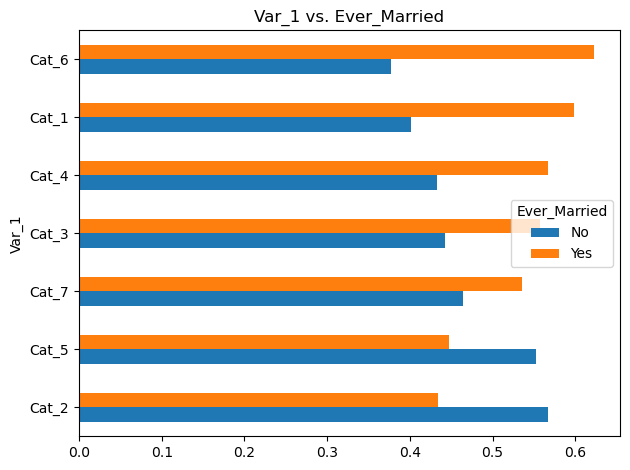

Graduated,No,Yes
Var_1,,
Cat_4,0.611525,0.388475
Cat_5,0.464912,0.535088
Cat_1,0.437126,0.562874
Cat_3,0.432507,0.567493
Cat_7,0.408922,0.591078
Cat_2,0.373002,0.626998
Cat_6,0.314050,0.685950


<Figure size 800x500 with 0 Axes>

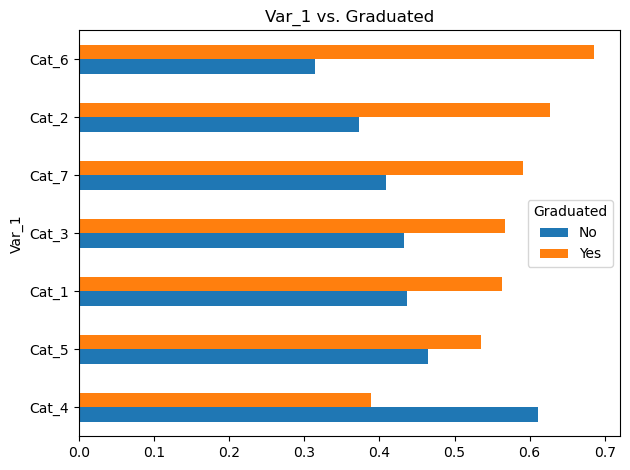

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Var_1,,,,,,,,,
Cat_5,0.324561,0.043860,0.087719,0.105263,0.017544,0.271930,0.070175,0.026316,0.052632
Cat_1,0.293413,0.077844,0.065868,0.119760,0.083832,0.191617,0.029940,0.077844,0.059880
Cat_6,0.361214,0.080792,0.065261,0.110715,0.080650,0.140068,0.027643,0.102878,0.030778
Cat_3,0.260790,0.095500,0.112948,0.147842,0.039486,0.176309,0.061524,0.041322,0.064279
Cat_4,0.211525,0.100339,0.191186,0.122034,0.077288,0.191186,0.025085,0.033220,0.048136
Cat_2,0.301954,0.106572,0.051510,0.129663,0.040853,0.296625,0.028419,0.019538,0.024867
Cat_7,0.345725,0.122677,0.081784,0.100372,0.048327,0.234201,0.003717,0.003717,0.059480


<Figure size 800x500 with 0 Axes>

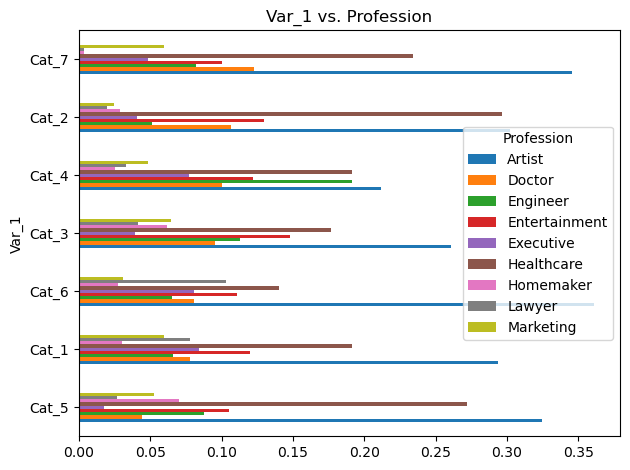

In [31]:
for col in var_list:
    
    # create cross tables
    ct = pd.crosstab(df[target], df[col], normalize='index')
    ct = ct.sort_values(ct.columns[1])
    print('\n')
    display(ct)
    
    # visualize
    plt.figure(figsize=(8,5))
    
    ct.plot(kind='barh', stacked=False)
    
    plt.title(f'Var_1 vs. {col}')
    plt.tight_layout()
    plt.show()

### Age

In [32]:
# assign variables
target = 'Age'
var_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']


              Age
Gender           
Male    43.897278
Female  43.048002


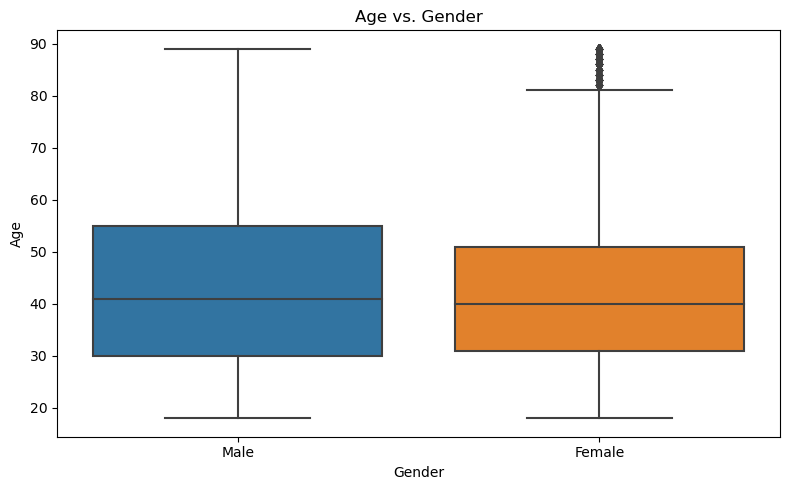


                    Age
Ever_Married           
Yes           51.266803
No            32.165131


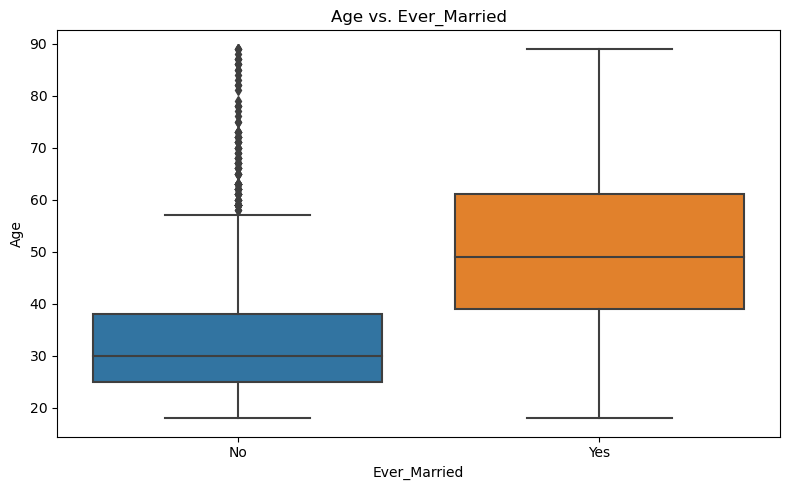


                 Age
Graduated           
Yes        46.568195
No         38.442953


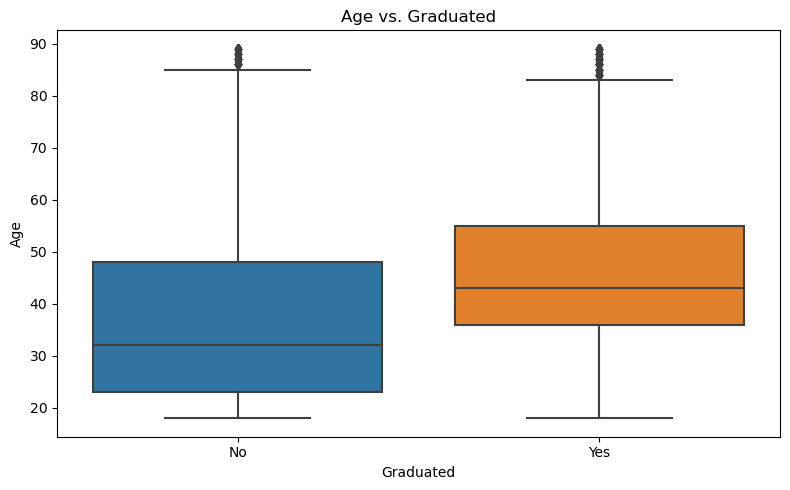


                     Age
Profession              
Lawyer         75.335308
Executive      51.118710
Artist         46.130747
Entertainment  42.943200
Engineer       41.547594
Homemaker      37.920732
Doctor         37.520430
Marketing      37.183623
Healthcare     26.732000


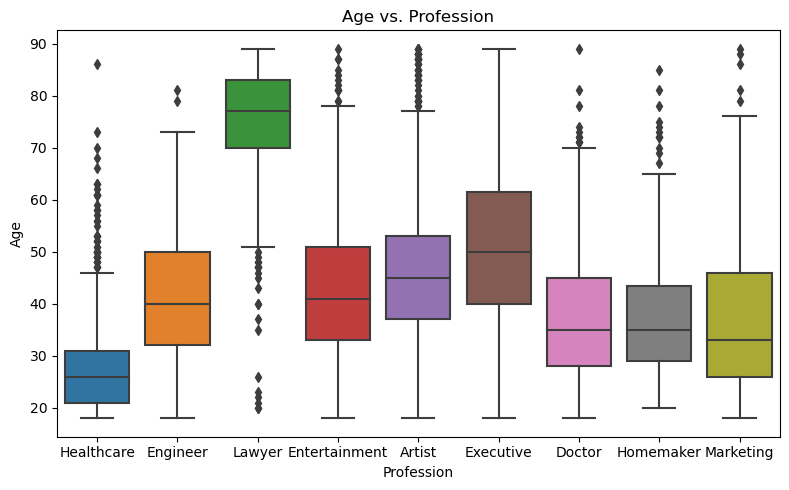


             Age
Var_1           
Cat_6  45.949416
Cat_1  39.784431
Cat_3  39.339761
Cat_4  39.149153
Cat_7  38.947955
Cat_2  37.298401
Cat_5  36.666667


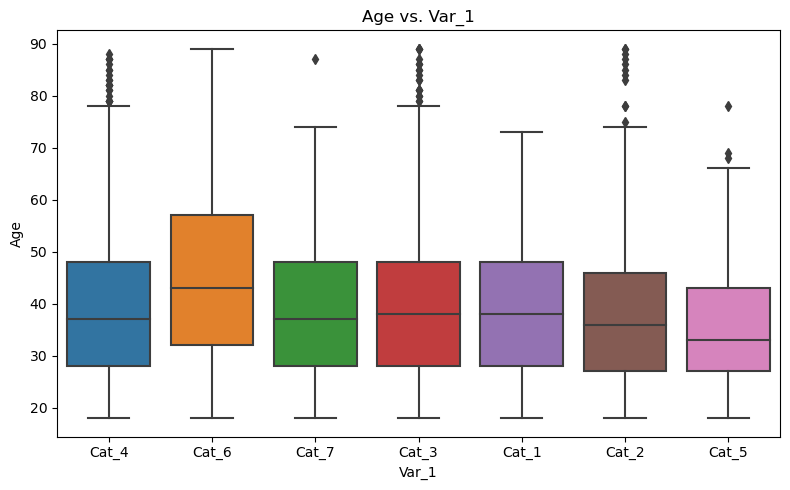

In [33]:
for col in var_list:
    
    mean = df.groupby(col)[target,col].mean().sort_values(by=target,ascending=False)
    print(f'\n{mean}')
    
    # visualize
    plt.figure(figsize=(8,5))
    
    sns.boxplot(df,
                  x=col,
                  y=target)
    
    plt.title(f'Age vs. {col}')
    plt.tight_layout()
    plt.show()

- Customers who are male, married before, graduated are generally older.
- Lawyers are much older on average than other professions, following by executives. Whereas artists tend to be younger.
- People who belongs in the Cat_6 category are on average older.

### Work Experience

In [34]:
# assign variables
target = 'Work_Experience'
var_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']


        Work_Experience
Gender                 
Female         2.828630
Male           2.446216


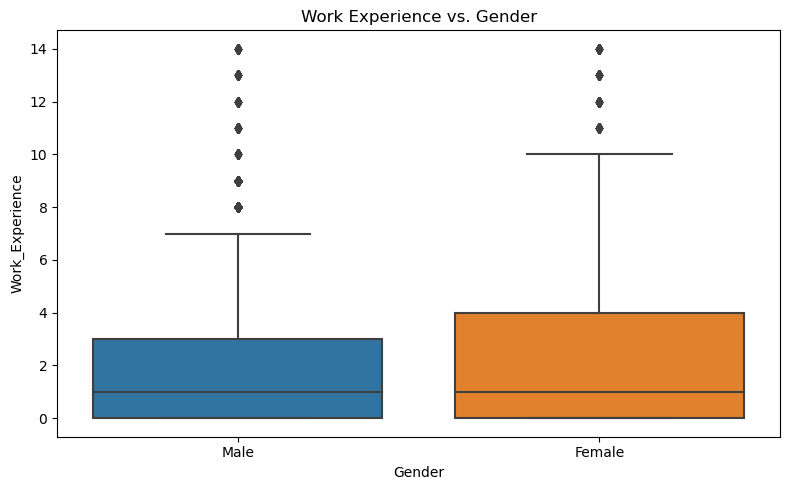


              Work_Experience
Ever_Married                 
No                   2.985782
Yes                  2.369629


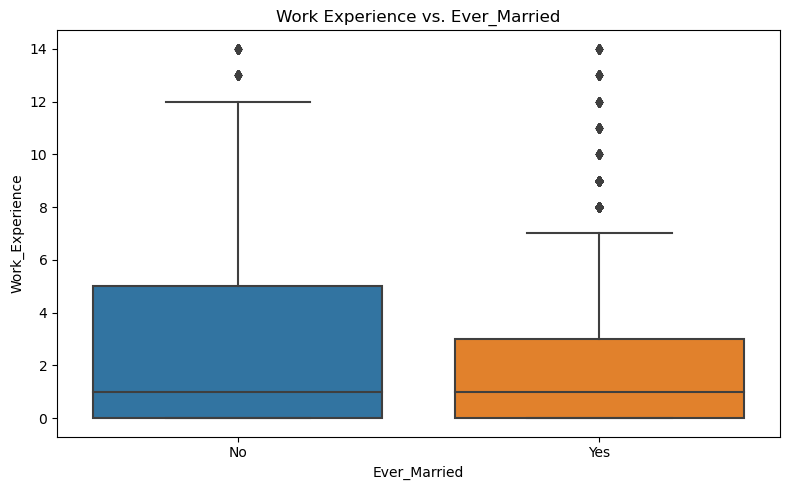


           Work_Experience
Graduated                 
Yes               2.708615
No                2.472442


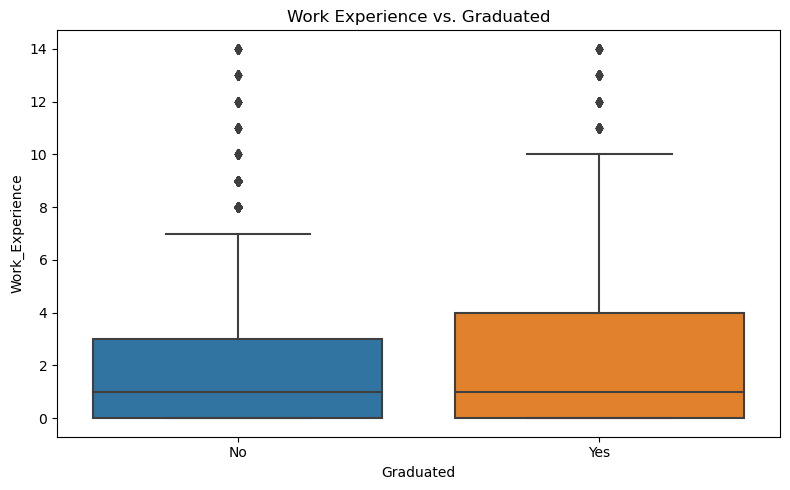


               Work_Experience
Profession                    
Homemaker             5.846368
Entertainment         2.739115
Artist                2.663693
Engineer              2.608170
Doctor                2.597400
Marketing             2.564786
Healthcare            2.563427
Executive             2.356645
Lawyer                1.430253


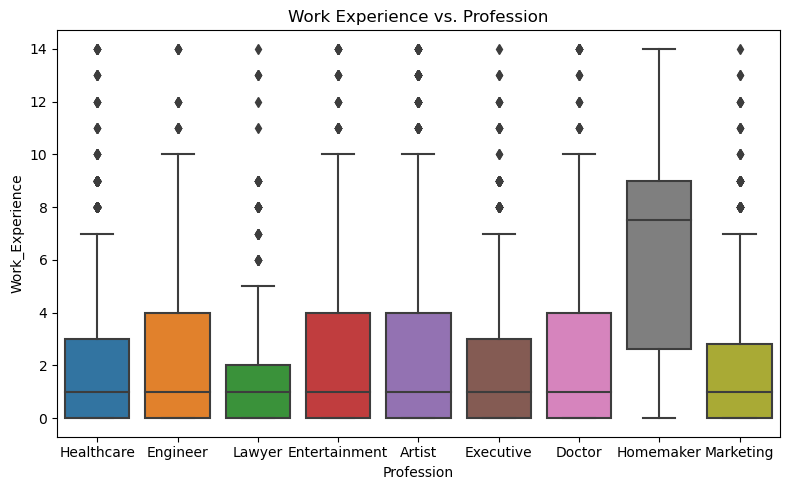


                Work_Experience
Spending_Score                 
Low                    2.788725
Average                2.471227
High                   2.175914


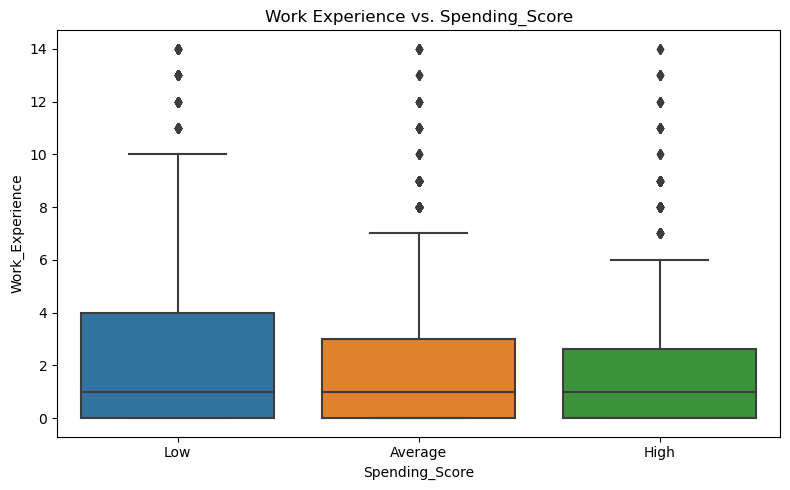


       Work_Experience
Var_1                 
Cat_2         2.796393
Cat_5         2.790341
Cat_7         2.688002
Cat_6         2.679426
Cat_3         2.569337
Cat_4         2.335676
Cat_1         2.129551


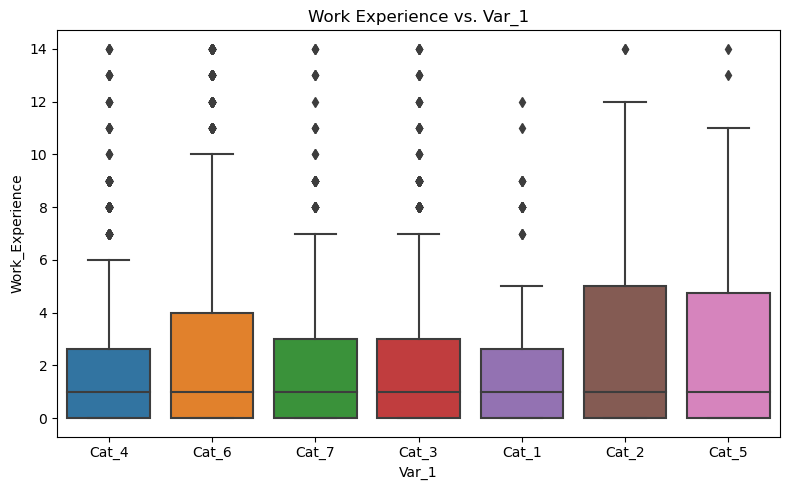

In [35]:
for col in var_list:
    
    mean = df.groupby(col)[target,col].mean().sort_values(by=target,ascending=False)
    print(f'\n{mean}')
    
    # visualize
    plt.figure(figsize=(8,5))
    
    sns.boxplot(df,
                  x=col,
                  y=target)
    
    plt.title(f'Work Experience vs. {col}')
    plt.tight_layout()
    plt.show()

- Customers who are female, never married, or a graduate tend to have more work experience
- All professions have a very consistent length of work experience, except for homemakers who possess the greatest amount of work experience, in contrast to lawyers, who have the least
- Looks like the more work experience the customers have, the less they spend.
- Customers under Cat_2 and Cat_5 have more work experience.

### Family Size

In [36]:
# assign variables
target = 'Family_Size'
var_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']


        Family_Size
Gender             
Male       2.924120
Female     2.747703


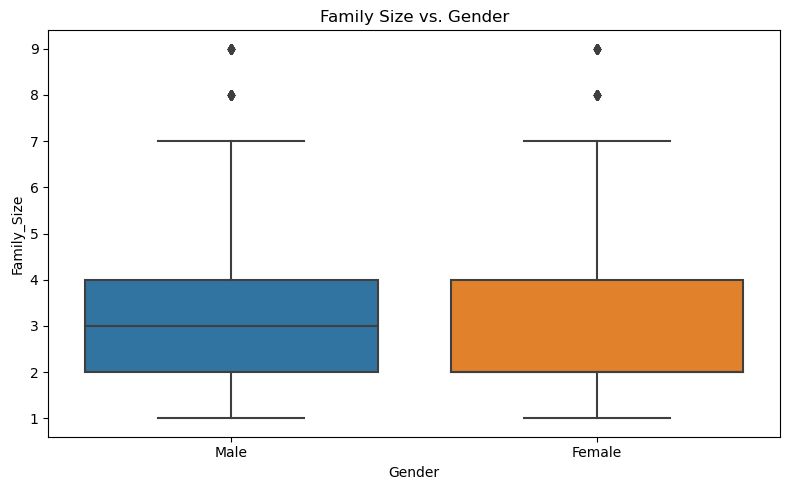


              Family_Size
Ever_Married             
No               2.984327
Yes              2.748180


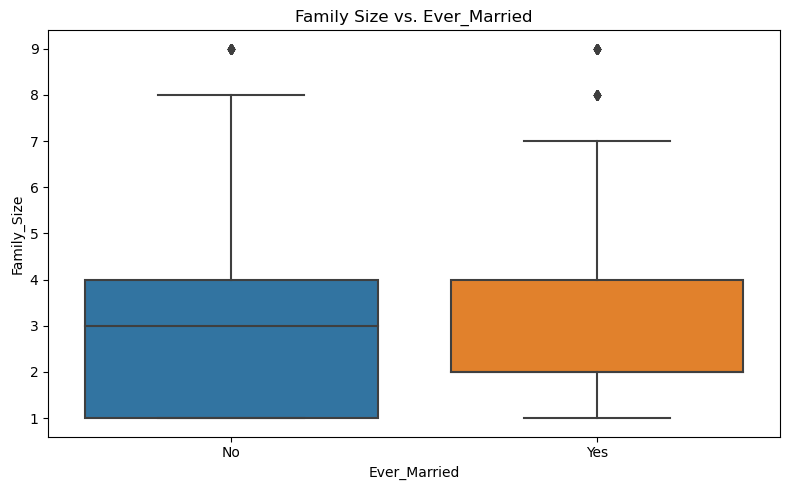


           Family_Size
Graduated             
No            3.295348
Yes           2.571935


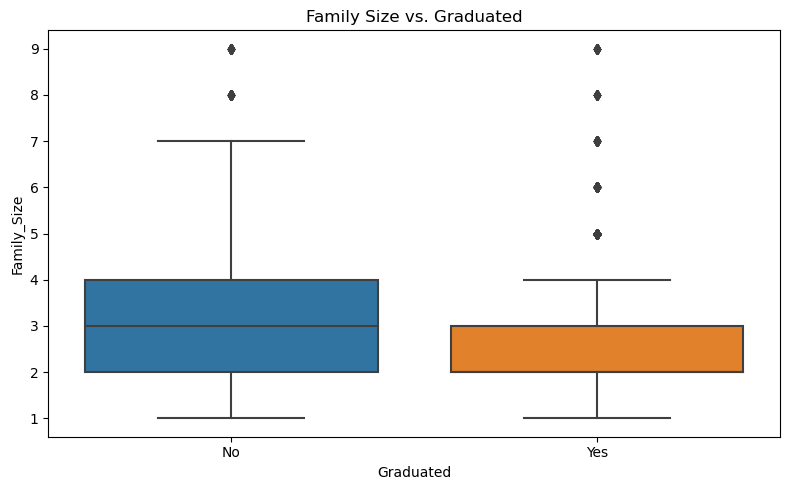


               Family_Size
Profession                
Healthcare        3.641909
Executive         3.428032
Marketing         3.090742
Engineer          2.972605
Doctor            2.887679
Entertainment     2.774614
Artist            2.518283
Homemaker         2.320347
Lawyer            1.994794


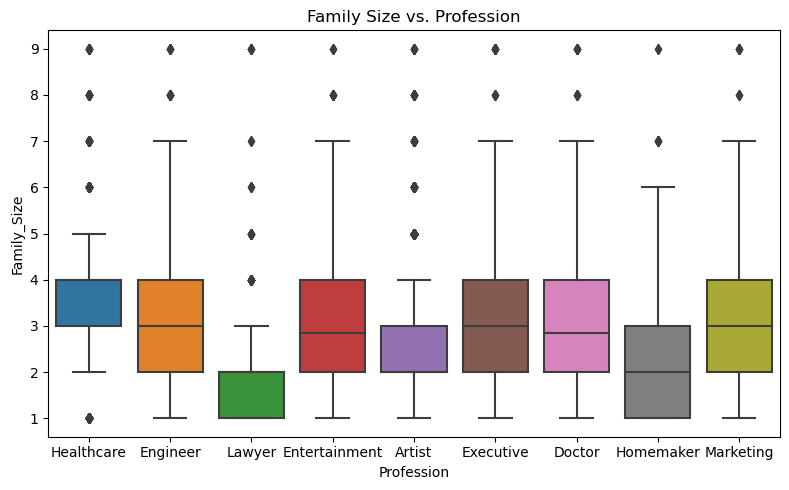


                Family_Size
Spending_Score             
Average            3.091627
High               2.973302
Low                2.713084


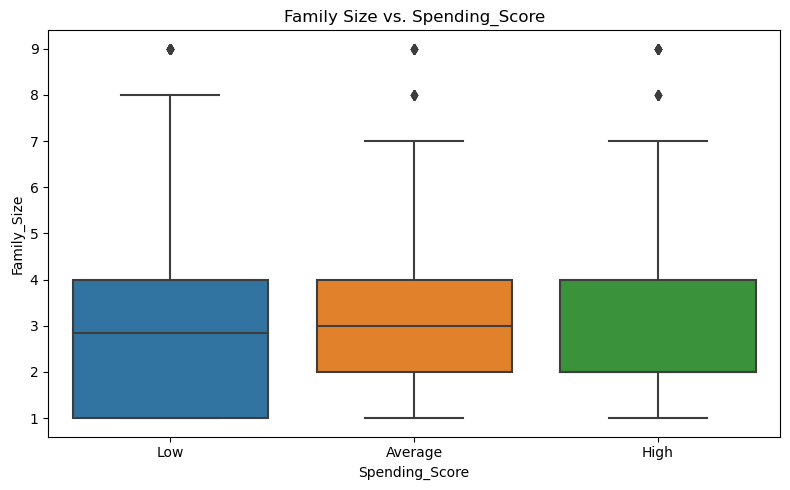


       Family_Size
Var_1             
Cat_4     3.479740
Cat_2     3.409699
Cat_5     3.370917
Cat_7     3.182634
Cat_1     3.024722
Cat_3     2.906674
Cat_6     2.629517


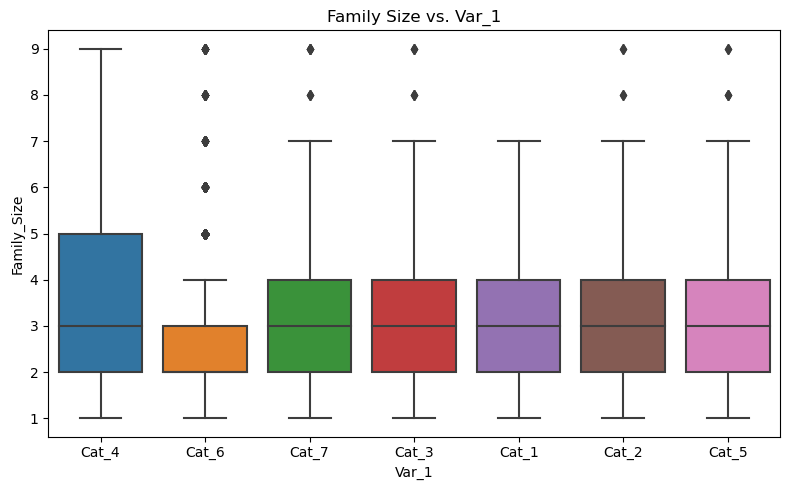

In [37]:
for col in var_list:
    
    mean = df.groupby(col)[target,col].mean().sort_values(by=target,ascending=False)
    print(f'\n{mean}')
    
    # visualize
    plt.figure(figsize=(8,5))
    
    sns.boxplot(df,
                  x=col,
                  y=target)
    
    plt.title(f'Family Size vs. {col}')
    plt.tight_layout()
    plt.show()

- Customers have never married before are more likely to live a single-person live style.
- Customers who are non-graduates, or lawyers  have a bigger family size on average.
- Customers who live alone tend to spend less money.
- Customers under Cat_4 and Cat_5 are more likely to have a bigger family, while Cat_6 customers' families are smaller.

### Joint Plots

<Figure size 800x500 with 0 Axes>

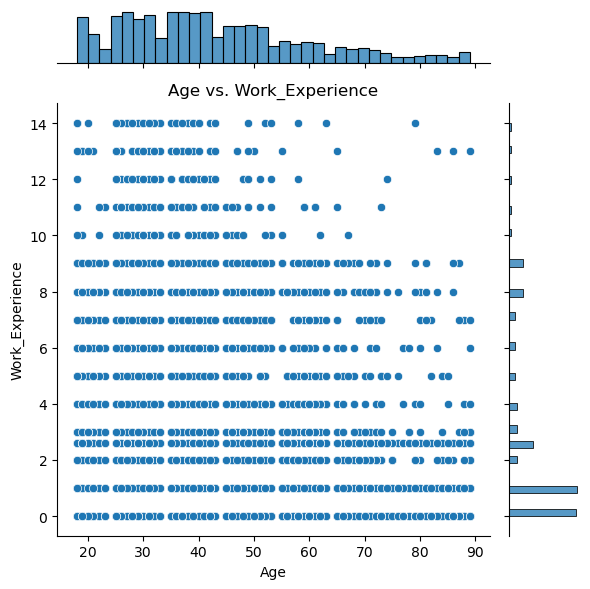

<Figure size 800x500 with 0 Axes>

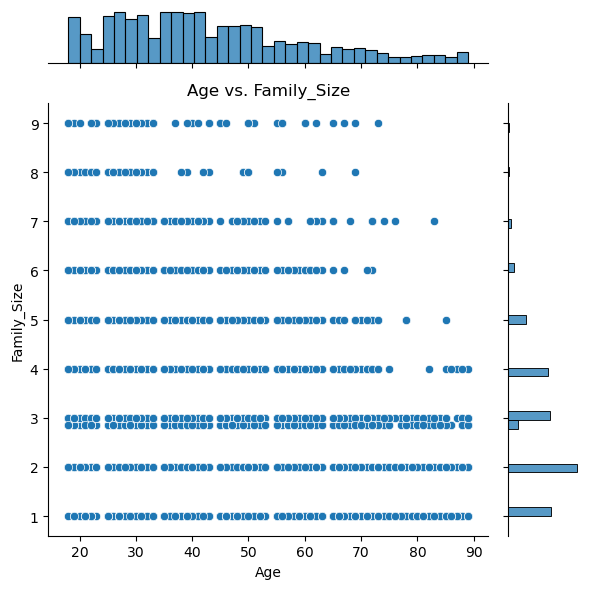

<Figure size 800x500 with 0 Axes>

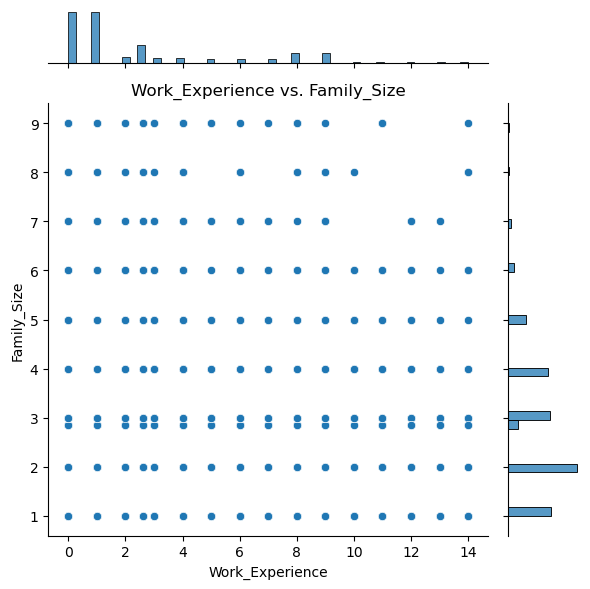

In [38]:
# list of numerical features
var = ['Age', 'Work_Experience', 'Family_Size']

# create joint plots for each combination of the two features
for i in range(len(var)):
    for j in range(i+1, len(var)):
        
        plt.figure(figsize=(8,5))
        sns.jointplot(data=df,
                      x=var[i],
                      y=var[j])
        plt.title(f'{var[i]} vs. {var[j]}')
        
        plt.tight_layout()
        plt.show()

# Export

In [40]:
df.to_csv('df_cleaned.csv',index=False)